### Work done for the rebuttal

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

import logging
logging.getLogger('rpy2').setLevel(logging.WARNING)

# Importing dependencies
%load_ext autoreload
%autoreload 2
import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
data_clusterpc_1 = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterPC_simulation_1.pkl')
data_clusterpc_2 = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterPC_simulation_2.pkl')
data_clusterfci = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterFCI_simulation.pkl')
data_cluster_vs_fcitiers = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_cluster_vs_fcitiers_final.pkl')
# data = load_experiment_folder('clustercausal\experiments\_results')
# data.to_pickle('clustercausal\experiments\_results_dataframes_for_simulations\cluster_ci_tests_nodes_comparison.pkl')
data_ci_test_nodes = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\cluster_ci_tests_nodes_comparison.pkl')

In [3]:
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']
overall_metrics = prec_recall_metrics + dist_metrics + indep_test_metrics

In [4]:
prec_recall_metrics_with_pruned = ['base_adj_precision', 'pruned_base_adj_precision', 'cluster_adj_precision', \
           'base_adj_recall', 'pruned_base_adj_recall','cluster_adj_recall', \
           'base_adj_f1_score', 'pruned_base_adj_f1_score', 'cluster_adj_f1_score']
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']
prec_recall_metrics_with_fcitiers = ['base_adj_precision', 'cluster_adj_precision', 'fcitiers_adj_precision',\
              'base_adj_recall', 'cluster_adj_recall', 'fcitiers_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score', 'fcitiers_adj_f1_score']
extended_metrics = prec_recall_metrics_with_fcitiers + ['base_base_shd', 'cluster_cluster_shd', 'fcitiers_fcitiers_shd', 'Base indep tests', 'Cluster indep tests']

         Base indep tests  C-PC indep tests  ratio
n_edges                                           
15.0               1136.0             659.0   0.58
30.0               2998.0            1875.0   0.63
50.0               5228.0            3262.0   0.62
80.0               7181.0            4409.0   0.61
150.0              8362.0            5107.0   0.61


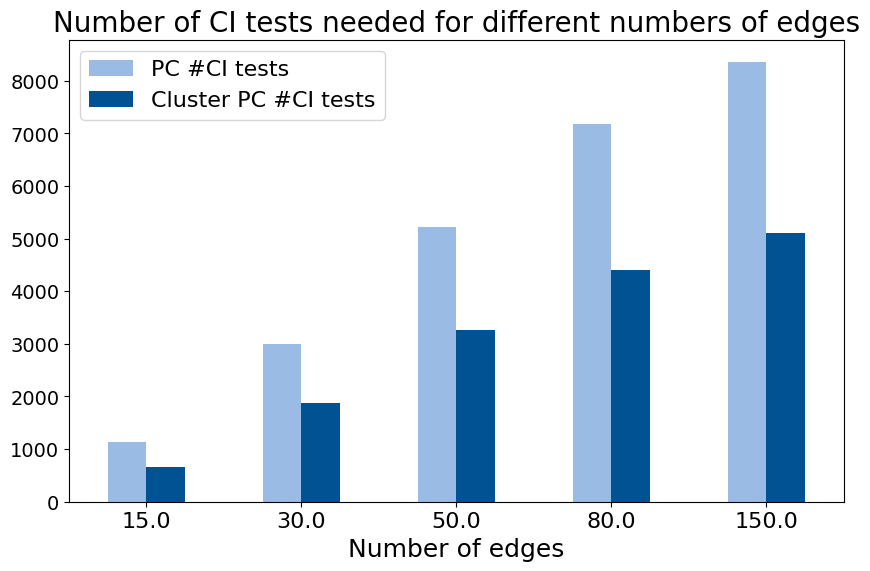

In [5]:
data_all = data_clusterpc_1
# colors = ['#A4C2F4', '#3333FF', '#4D68D5']
colors = ['#9ABCE4', '#005293', '#5E94D4']
data_all.groupby('n_edges')[indep_test_metrics].mean().plot(kind='bar', figsize=(10, 6), color = colors)
plt.title('Number of CI tests needed for different numbers of edges', fontsize = 20)
plt.xlabel('Number of edges', fontsize=18)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.tick_params(axis = 'x', which = 'major', labelsize = 16, rotation = 0)
label_names = ['PC #CI tests', 'Cluster PC #CI tests']
plt.legend(label_names,  fontsize=16, loc='upper left')
plt.savefig('imgs/ci_tests_clusters_diagram.pdf', bbox_inches='tight')
with_ratio = data_all.groupby('n_edges')[indep_test_metrics].mean().round(0)
with_ratio['ratio'] = with_ratio['C-PC indep tests'] / with_ratio['Base indep tests']
print(with_ratio.round(2))

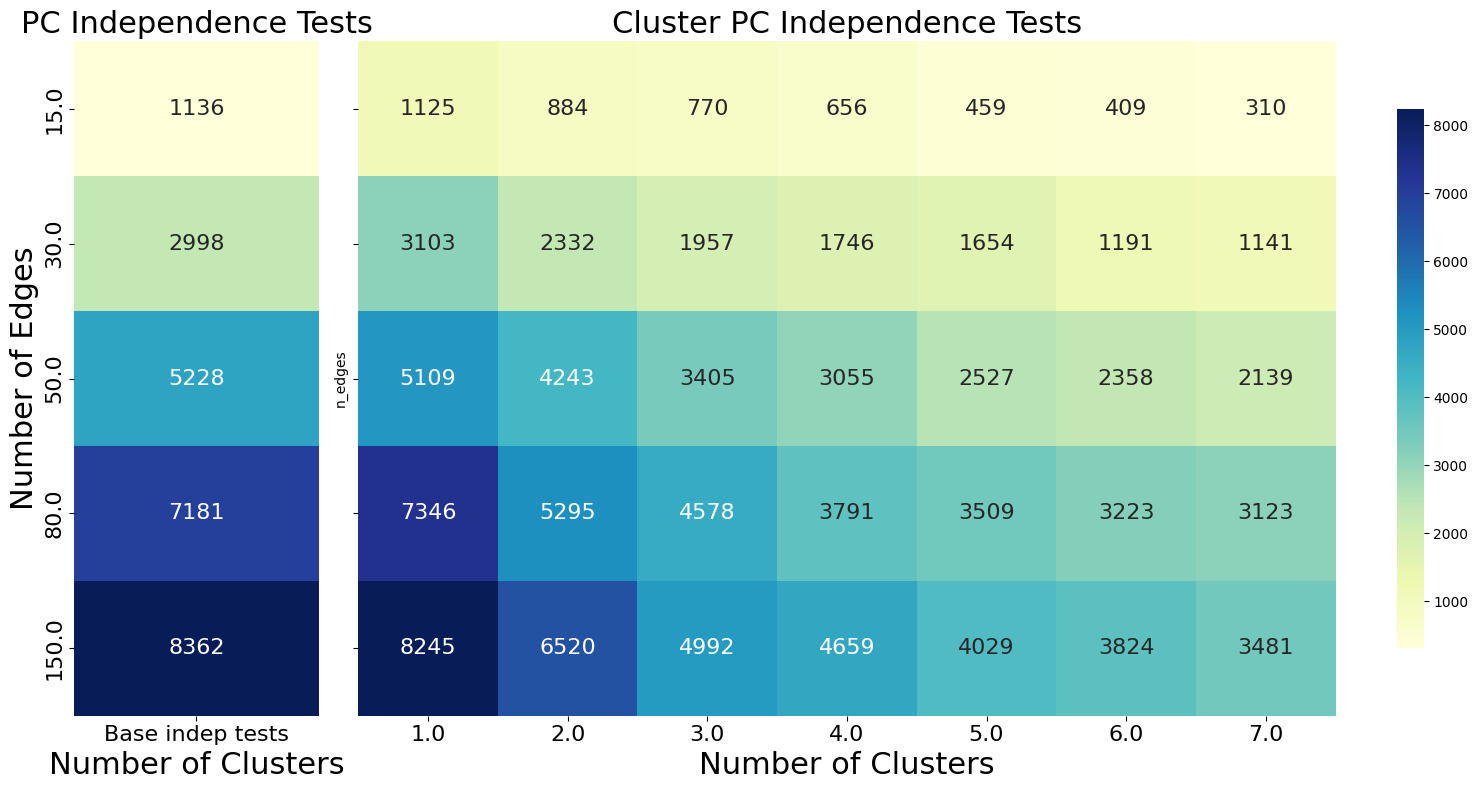

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by and calculate the mean for all metrics
grouped_data = data_all.groupby(['n_edges', 'n_clusters'])[indep_test_metrics].mean().reset_index()

# Separate metrics: Adjust these based on how you distinguish "base" and "C-PC" metrics
base_metric = 'Base indep tests'    # Replace with your base test metric name
cpc_metric = 'C-PC indep tests'     # Replace with your C-PC test metric name

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 5]}, sharey=True)

# Heatmap for Base Independence Tests
heatmap_data_base = pd.DataFrame(grouped_data.groupby(['n_edges'])[indep_test_metrics].mean().reset_index().set_index('n_edges')[base_metric])
cbar = sns.heatmap(heatmap_data_base, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[0], cbar=False, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[0].set_title("PC Independence Tests", fontsize=22)
axes[0].set_xlabel("Number of Clusters", fontsize=22)
axes[0].set_ylabel("Number of Edges", fontsize=22)
axes[0].tick_params(axis='x', labelsize=16) 
axes[0].tick_params(axis='y', labelsize=16)

# Heatmap for C-PC Independence Tests
heatmap_data_cpc = grouped_data.pivot(index='n_edges', columns='n_clusters', values=cpc_metric)
sns.heatmap(heatmap_data_cpc, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1], cbar=True, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[1].set_title("Cluster PC Independence Tests", fontsize=22)
axes[1].set_xlabel("Number of Clusters", fontsize=22)
axes[1].tick_params(axis='x', labelsize=16) 
axes[1].tick_params(axis='y', labelsize=16)
# cbar.ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
indep_test_metrics

['Base indep tests', 'C-PC indep tests']

In [8]:
for column in data_ci_test_nodes.columns:
    print(column)


base_adj_f1_score
base_adj_false_negative
base_adj_false_positive
base_adj_precision
base_adj_recall
base_adj_true_negative
base_adj_true_positive
base_arrow_f1_score
base_arrow_f1_score_ce
base_arrow_false_negative
base_arrow_false_negative_ce
base_arrow_false_positive
base_arrow_false_positive_ce
base_arrow_precision
base_arrow_precision_ce
base_arrow_recall
base_arrow_recall_ce
base_arrow_true_negative
base_arrow_true_negative_ce
base_arrow_true_positive
base_arrow_true_positive_ce
base_base_shd
base_sid_lower
cluster_adj_f1_score
cluster_adj_false_negative
cluster_adj_false_positive
cluster_adj_precision
cluster_adj_recall
cluster_adj_true_negative
cluster_adj_true_positive
cluster_arrow_f1_score
cluster_arrow_f1_score_ce
cluster_arrow_false_negative
cluster_arrow_false_negative_ce
cluster_arrow_false_positive
cluster_arrow_false_positive_ce
cluster_arrow_precision
cluster_arrow_precision_ce
cluster_arrow_recall
cluster_arrow_recall_ce
cluster_arrow_true_negative
cluster_arrow_true

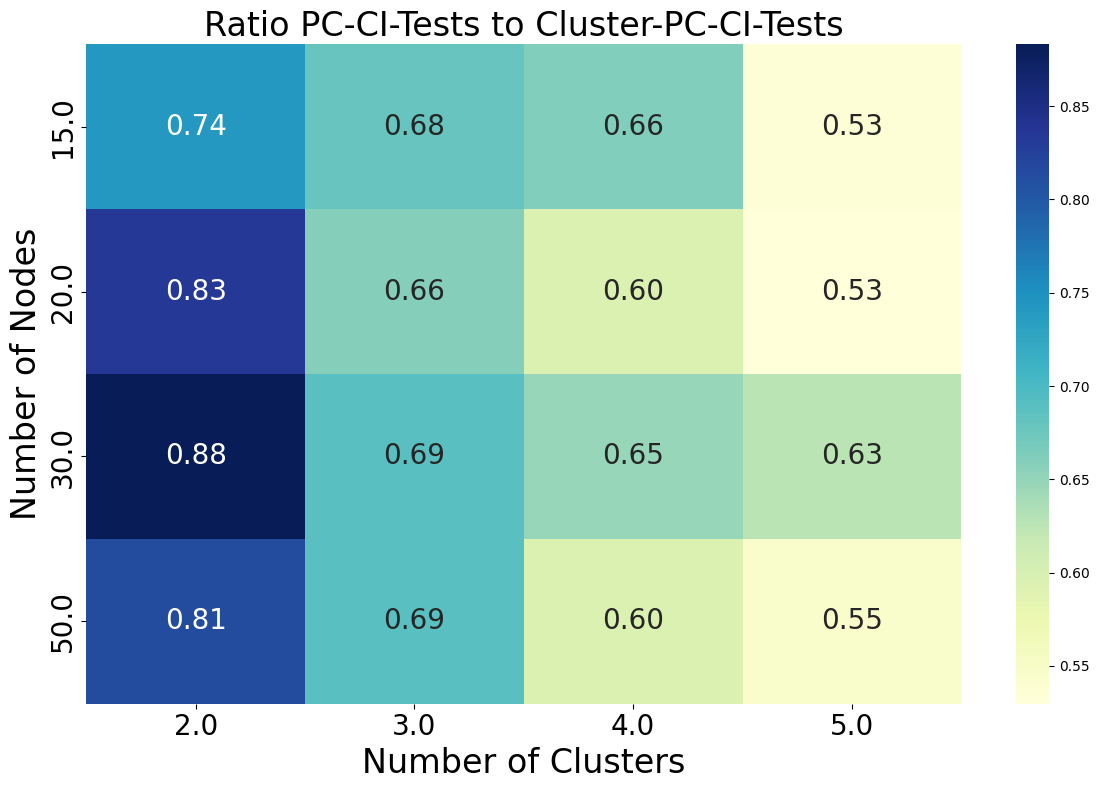

In [9]:
indep_test_metrics2 = ['Base indep tests', 'Cluster indep tests']
# Group by and calculate the mean for all metrics
grouped_data = data_ci_test_nodes.groupby(['n_nodes', 'n_clusters'])[indep_test_metrics2].mean().reset_index()

# Metrics
base_metric = 'Base indep tests'    # Replace with your base test metric name
cpc_metric = 'Cluster indep tests'     # Replace with your C-PC test metric name

# Normalize C-PC metrics by the number of base tests
# Ensure there are no division errors (e.g., divide by zero)
grouped_data['Normalized C-PC'] = grouped_data[cpc_metric] / grouped_data[base_metric]

# Pivot data for the heatmap
heatmap_data = grouped_data.pivot(index='n_nodes', columns='n_clusters', values='Normalized C-PC')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            cbar_kws={'shrink': 1}, annot_kws={"size": 20})

# Set titles and labels
plt.title("Ratio PC-CI-Tests to Cluster-PC-CI-Tests", fontsize=24)
plt.xlabel("Number of Clusters", fontsize=24)
plt.ylabel("Number of Nodes", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust layout
plt.tight_layout()
plt.savefig('imgs/ci_tests_clusters_ratio_diagram_nodes.pdf', bbox_inches='tight')
plt.show()

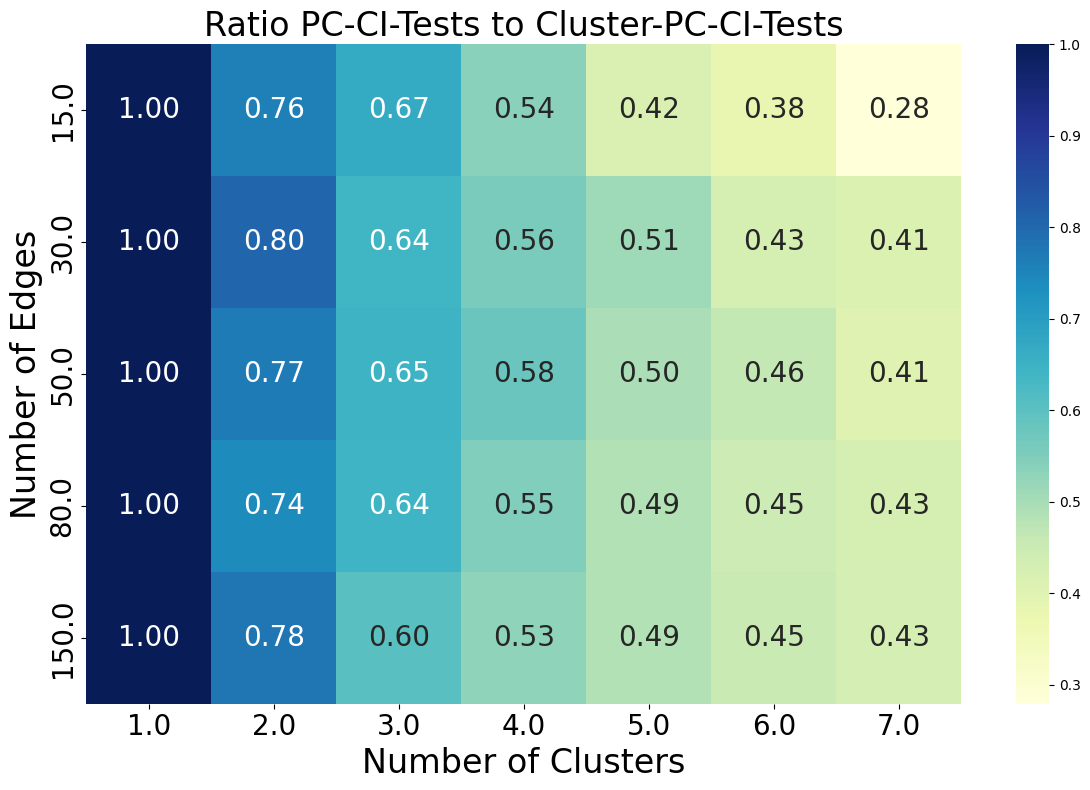

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by and calculate the mean for all metrics
grouped_data = data_all.groupby(['n_edges', 'n_clusters'])[indep_test_metrics].mean().reset_index()

# Metrics
base_metric = 'Base indep tests'    # Replace with your base test metric name
cpc_metric = 'C-PC indep tests'     # Replace with your C-PC test metric name

# Normalize C-PC metrics by the number of base tests
# Ensure there are no division errors (e.g., divide by zero)
grouped_data['Normalized C-PC'] = grouped_data[cpc_metric] / grouped_data[base_metric]

# Pivot data for the heatmap
heatmap_data = grouped_data.pivot(index='n_edges', columns='n_clusters', values='Normalized C-PC')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            cbar_kws={'shrink': 1}, annot_kws={"size": 20})

# Set titles and labels
plt.title("Ratio PC-CI-Tests to Cluster-PC-CI-Tests", fontsize=24)
plt.xlabel("Number of Clusters", fontsize=24)
plt.ylabel("Number of Edges", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust layout
plt.tight_layout()
plt.savefig('imgs/ci_tests_clusters_ratio_diagram_edges.pdf', bbox_inches='tight')
plt.show()


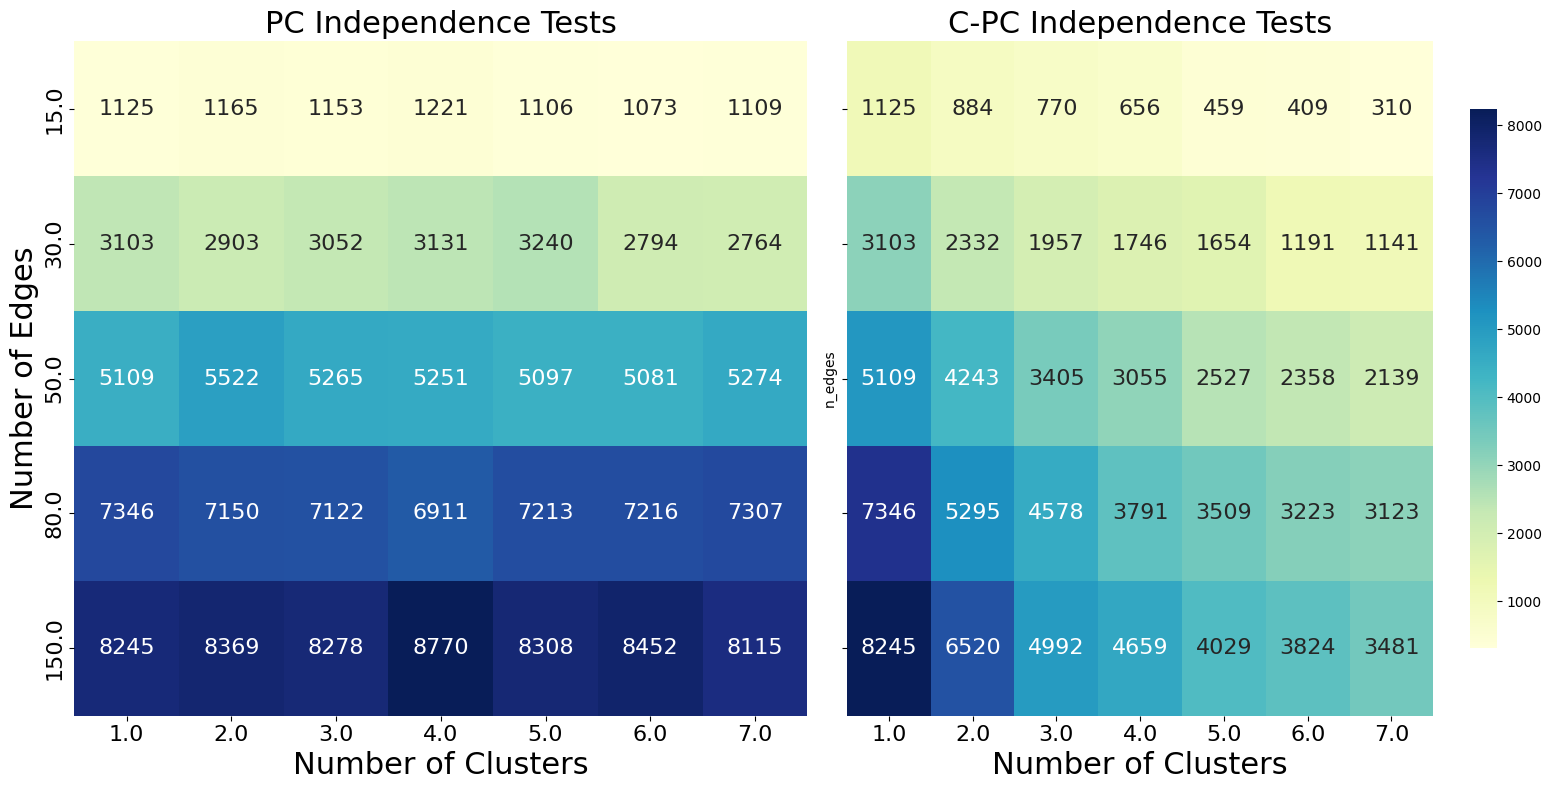

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by and calculate the mean for all metrics
grouped_data = data_all.groupby(['n_edges', 'n_clusters'])[indep_test_metrics].mean().reset_index()

# Separate metrics: Adjust these based on how you distinguish "base" and "C-PC" metrics
base_metric = 'Base indep tests'    # Replace with your base test metric name
cpc_metric = 'C-PC indep tests'     # Replace with your C-PC test metric name

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Heatmap for Base Independence Tests
heatmap_data_base = grouped_data.pivot(index='n_edges', columns='n_clusters', values=base_metric)
cbar = sns.heatmap(heatmap_data_base, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[0], cbar=False, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[0].set_title("PC Independence Tests", fontsize=22)
axes[0].set_xlabel("Number of Clusters", fontsize=22)
axes[0].set_ylabel("Number of Edges", fontsize=22)
axes[0].tick_params(axis='x', labelsize=16) 
axes[0].tick_params(axis='y', labelsize=16)

# Heatmap for C-PC Independence Tests
heatmap_data_cpc = grouped_data.pivot(index='n_edges', columns='n_clusters', values=cpc_metric)
sns.heatmap(heatmap_data_cpc, annot=True, fmt=".0f", cmap="YlGnBu", ax=axes[1], cbar=True, \
            cbar_kws={'shrink': 0.8}, annot_kws={"size": 16})
axes[1].set_title("C-PC Independence Tests", fontsize=22)
axes[1].set_xlabel("Number of Clusters", fontsize=22)
axes[1].tick_params(axis='x', labelsize=16) 
axes[1].tick_params(axis='y', labelsize=16)
# cbar.ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


| Number of Edges | Clusters: 1 | Clusters: 2 | Clusters: 3 | Clusters: 4 | Clusters: 5 | Clusters: 6 | Clusters: 7 |
|------------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| 15               | 1.00        | 0.76        | 0.67        | 0.54        | 0.42        | 0.38        | 0.28        |
| 30               | 1.00        | 0.80        | 0.64        | 0.56        | 0.51        | 0.43        | 0.41        |
| 50               | 1.00        | 0.77        | 0.65        | 0.58        | 0.50        | 0.46        | 0.41        |
| 80               | 1.00        | 0.74        | 0.64        | 0.55        | 0.49        | 0.45        | 0.43        |
| 150              | 1.00        | 0.78        | 0.60        | 0.53        | 0.49        | 0.45        | 0.43        |


| Number of Nodes | Clusters: 2 | Clusters: 3 | Clusters: 4 | Clusters: 5 |
|------------------|-------------|-------------|-------------|-------------|
| 15.0            | 0.74        | 0.68        | 0.66        | 0.53        |
| 20.0            | 0.83        | 0.66        | 0.60        | 0.53        |
| 30.0            | 0.88        | 0.69        | 0.65        | 0.63        |
| 50.0            | 0.81        | 0.69        | 0.60        | 0.55        |

| n_edges | C-PC indep tests | Base indep tests | ratio (%) |
|---------|------------------|------------------|-----------|
| 15      | 659             | 1136            | 58%       |
| 30      | 1875            | 2998            | 63%       |
| 50      | 3262            | 5228            | 62%       |
| 80      | 4409            | 7181            | 61%       |
| 150     | 5107            | 8362            | 61%       |


| Metric                     | PC/FCI         | C-PC/C-FCI   | FCITiers |
|----------------------------|--------------|--------------|--------------|
| adj_precision              | **68.3%**    | 66.3%        | 66.1%        |
| adj_recall                 | 50.6%        | **54.5%**    | 51.6%        |
| adj_f1_score               | 56.9%        | **58.9%**    | 57.0%        |
| base_shd                   | 19.88        | 19.45        | **19.31**    |
| indep_tests                | 1237.45      | **696.27**   | -            |
| arrow_precision            | 52.7%        | 61.3%        | **61.9%**    |
| arrow_recall               | 28.9%        | **47.9%**    | 45.0%        |
| arrow_f1_score             | 36.4%        | **52.9%**    | 50.8%        |

https://ibb.co/MDdKwt9 

https://ibb.co/TmrYc1n

https://ibb.co/KrNCvWn

In [12]:
## load node data